<a href="https://colab.research.google.com/github/hettiepath/EMCA/blob/master/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import pandas as pd

## UCEC 데이터 준비

```
Endometrioid/
 --> test sample for histologic_type (by using modeling of classification)
 --> modeling for histologic_grade : train & test
  Grade1/
  Grade2/
  Grade3/
Serous/
Etc_carcinoma/
```



### CPTAC-UCEC
https://wiki.cancerimagingarchive.net/display/Public/CPTAC-UCEC

This collection contains subjects from the National Cancer Institute’s Clinical Proteomic Tumor Analysis Consortium Uterine Corpus Endometrial Carcinoma (CPTAC-UCEC) cohort.

In [ ]:
%cd '/content/drive/My Drive/ImageAnalysis/digital_pathology/ImageDataset/EMCA'

/content/drive/My Drive/ImageAnalysis/digital_pathology/ImageDataset/EMCA


In [ ]:
py_ucec_df = pd.read_csv('ucec.csv',  encoding='utf-8')
py_ucec_df

,Unnamed: 0,tumor_code,case_id,discovery_study,gender,age,height_in_cm,weight_in_kg,BMI,race,ethnicity,tumor_site,tumor_size_in_cm,histologic_type,histologic_grade,tumor_stage_pathological,AJCC_or_TNM_cancer_staging_edition,pathologic_staging_primary_tumor_pT,pathologic_staging_regional_lymph_nodes_pN,pathologic_staging_distant_metastasis_pM,clinical_staging_distant_metastasis_cM,vital_status_at_12months_follow_up,vital_status_at_24months_follow_up,residual_tumor,alcohol_consumption,tobacco_smoking_history,number_of_pack_years_smoked,tumor_status_at_12months_follow_up,tumor_status_at_24months_follow_up,days_from_initial_diagnosis_to_last_contact_at_12months_follow_up,days_from_initial_diagnosis_to_last_contact_at_24months_follow_up,specimens,inserted,updated,discovery_study/analyzed_samples,vital_status_at_48months_follow_up,tumor_status_at_48months_follow_up,days_from_initial_diagnosis_to_last_contact_at_48months_follow_up,tumor_site_other,vital_status_at_36months_follow_up,tumor_status_at_36months_follow_up,days_from_initial_diagnosis_to_last_contact_at_36months_follow_up,cause_of_death_at_48months_follow_up,days_from_initial_pathologic_diagnosis_to_death_at_48months_follow_up,histologic_grade_other,cause_of_death_at_24months_follow_up,days_from_initial_pathologic_diagnosis_to_death_at_24months_follow_up,number_of_years_consumed_more_than_2_drinks_per_day_for_men_or_more_than_1_for_women,cause_of_death_at_12months_follow_up,days_from_initial_pathologic_diagnosis_to_death_at_12months_follow_up,cause_of_death_at_36months_follow_up,days_from_initial_pathologic_diagnosis_to_death_at_36months_follow_up,histologic_type_other
0,0,UCEC,C3L-00006,Yes,Female,64,152.0,90.0,38.88,White,Not-Hispanic or Latino,Anterior endometrium,2.9,Endometrioid carcinoma,G1 Well differentiated,Stage I,Seventh Edition (2010),pT1a (FIGO IA),pN0,Staging Incomplete,cM0,Living,Living,R0: No residual tumor,Alcohol consumption history not available,"Current reformed smoker, more than 15 years",5.0,Tumor Free,Tumor Free,494.0,717.0,"[{'specimen_id': 'C3L-00006-31', 'tissue_type'...",2019-07-10T00:19:58.000Z,2019-07-10T00:19:58.000Z,Tumor_and_Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,UCEC,C3L-00008,Yes,Female,58,162.0,105.0,39.76,White,Not-Hispanic or Latino,Posterior endometrium,3.5,Endometrioid carcinoma,G1 Well differentiated,Stage I,Seventh Edition (2010),pT1a (FIGO IA),pNX,Staging Incomplete,cM0,Living,Living,R0: No residual tumor,Alcohol consumption equal to or less than 2 dr...,"Current reformed smoker, more than 15 years",19.0,Tumor Free,Tumor Free,440.0,624.0,"[{'specimen_id': 'C3L-00008-32', 'tissue_type'...",2019-07-10T00:19:58.000Z,2020-05-13T20:01:57.598Z,Tumor,Living,Tumor Free,898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,UCEC,C3L-00032,Yes,Female,50,163.0,136.0,51.19,White,Not-Hispanic or Latino,Other,4.5,Endometrioid carcinoma,G2 Moderately differentiated,Stage I,Seventh Edition (2010),pT1a (FIGO IA),pN0,Staging Incomplete,cM0,Living,Living,R0: No residual tumor,Lifelong non-drinker,"Current reformed smoker, more than 15 years",3.0,Tumor Free,Tumor Free,435.0,715.0,"[{'specimen_id': 'C3L-00032-31', 'tissue_type'...",2019-07-10T00:19:58.000Z,2020-05-11T14:28:20.015Z,Tumor,NaN,NaN,NaN,Anterior & Posterior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,UCEC,C3L-00086,No,Female,56,165.0,80.0,29.38,White,Not-Hispanic or Latino,Other,4.0,Endometrioid carcinoma,G1 Well differentiated,Stage I,Seventh Edition (2010),pT1a (FIGO IA),pNX,No pathologic evidence of distant metastasis,cM0,Living,Living,R0: No residual tumor,Alcohol consumption equal to or less than 2 dr...,Current smoker: Includes daily and non-daily s...,NaN,Tumor Free,With Tumor,330.0,701.0,"[{'specimen_id': 'C3L-00086-31', 'tissue_type'...",2019-07-10T00:19:58.000Z,2020-05-13T19:53:47.602Z,NaN,NaN,NaN,NaN,Both Anterior and Posterior Endometrium,Living,With Tumor,1046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
py_ucec_df[['case_id', 'histologic_grade', 'histologic_type']]

,case_id,histologic_grade,histologic_type
0,C3L-00006,G1 Well differentiated,Endometrioid carcinoma
1,C3L-00008,G1 Well differentiated,Endometrioid carcinoma
2,C3L-00032,G2 Moderately differentiated,Endometrioid carcinoma
3,C3L-00086,G1 Well differentiated,Endometrioid carcinoma
4,C3L-00090,G2 Moderately differentiated,Endometrioid carcinoma
...,...,...,...
245,C3N-02437,G2 Moderately differentiated,Endometrioid carcinoma
246,C3N-02636,G1 Well differentiated,Endometrioid carcinoma
247,C3N-02976,G3 Poorly differentiated,Endometrioid carcinoma
248,C3L-01284,G1 Well differentiated,Endometrioid carcinoma


In [ ]:
ucec_case_names=[]
ucec_grade=[]
ucec_type=[]
for i in range(len(py_ucec_df[['case_id', 'histologic_grade', 'histologic_type']])):
  ucec_case_names.append(py_ucec_df[['case_id', 'histologic_grade', 'histologic_type']]['case_id'][i])
  ucec_grade.append(py_ucec_df[['case_id', 'histologic_grade', 'histologic_type']]['histologic_grade'][i])
  ucec_type.append(py_ucec_df[['case_id', 'histologic_grade', 'histologic_type']]['histologic_type'][i])

In [ ]:
set(ucec_grade), len(ucec_grade)

({'G1 Well differentiated',
  'G2 Moderately differentiated',
  'G3 Poorly differentiated',
  'Other'},
 250)

In [ ]:
set(ucec_type), len(ucec_type)

({'Carcinosarcoma',
  'Clear cell carcinoma',
  'Endometrioid carcinoma',
  'Mixed cell adenocarcinoma',
  'Mucinous carcinoma',
  'Other',
  'Serous carcinoma'},
 250)

In [ ]:
path_ucec = '/content/drive/My Drive/ImageAnalysis/digital_pathology/ImageDataset/EMCA/CPTAC-UCEC'
%cd $path_ucec

/content/drive/My Drive/ImageAnalysis/digital_pathology/ImageDataset/EMCA/CPTAC-UCEC


In [ ]:
file_name = py_ucec_df[['case_id', 'histologic_grade', 'histologic_type']]['case_id'][0]
glob.glob(path_ucec+'/'+file_name+'*.svs')

['/content/drive/My Drive/ImageAnalysis/digital_pathology/ImageDataset/EMCA/CPTAC-UCEC/C3L-00006-26.svs',
 '/content/drive/My Drive/ImageAnalysis/digital_pathology/ImageDataset/EMCA/CPTAC-UCEC/C3L-00006-21.svs']

In [ ]:
# Get Image names stored in "Images" folder
ucec_path_names=[]
for file_name in ucec_case_names:
  for file in glob.glob(path_ucec+'/'+file_name+'*.svs'):
    ucec_path_names.append(file)

In [ ]:
len(ucec_path_names)

879

In [ ]:
py_ucec_df.groupby(ucec_type).count()

,Unnamed: 0,tumor_code,case_id,discovery_study,gender,age,height_in_cm,weight_in_kg,BMI,race,ethnicity,tumor_site,tumor_size_in_cm,histologic_type,histologic_grade,tumor_stage_pathological,AJCC_or_TNM_cancer_staging_edition,pathologic_staging_primary_tumor_pT,pathologic_staging_regional_lymph_nodes_pN,pathologic_staging_distant_metastasis_pM,clinical_staging_distant_metastasis_cM,vital_status_at_12months_follow_up,vital_status_at_24months_follow_up,residual_tumor,alcohol_consumption,tobacco_smoking_history,number_of_pack_years_smoked,tumor_status_at_12months_follow_up,tumor_status_at_24months_follow_up,days_from_initial_diagnosis_to_last_contact_at_12months_follow_up,days_from_initial_diagnosis_to_last_contact_at_24months_follow_up,specimens,inserted,updated,discovery_study/analyzed_samples,vital_status_at_48months_follow_up,tumor_status_at_48months_follow_up,days_from_initial_diagnosis_to_last_contact_at_48months_follow_up,tumor_site_other,vital_status_at_36months_follow_up,tumor_status_at_36months_follow_up,days_from_initial_diagnosis_to_last_contact_at_36months_follow_up,cause_of_death_at_48months_follow_up,days_from_initial_pathologic_diagnosis_to_death_at_48months_follow_up,histologic_grade_other,cause_of_death_at_24months_follow_up,days_from_initial_pathologic_diagnosis_to_death_at_24months_follow_up,number_of_years_consumed_more_than_2_drinks_per_day_for_men_or_more_than_1_for_women,cause_of_death_at_12months_follow_up,days_from_initial_pathologic_diagnosis_to_death_at_12months_follow_up,cause_of_death_at_36months_follow_up,days_from_initial_pathologic_diagnosis_to_death_at_36months_follow_up,histologic_type_other
Carcinosarcoma,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2,1,2,1,2,2,2,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
Clear cell carcinoma,3,3,3,3,3,3,3,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
Endometrioid carcinoma,209,209,209,208,209,209,201,201,201,120,120,209,198,209,209,201,201,201,201,201,201,198,177,201,201,201,26,198,177,196,177,209,209,209,86,3,3,3,134,63,63,63,2,2,2,3,3,7,2,2,3,3,1
Mixed cell adenocarcinoma,3,3,3,3,3,3,3,3,3,1,1,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,0,3,2,3,2,3,3,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mucinous carcinoma,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
Other,4,4,4,4,4,4,4,4,4,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1,4,4,4,4,4,4,4,0,0,0,0,4,1,1,1,0,0,1,0,0,0,0,0,0,0,4
Serous carcinoma,28,28,28,28,28,28,27,27,27,20,20,28,27,28,28,27,27,27,27,27,27,25,19,27,27,27,2,25,19,25,19,28,28,28,13,0,0,0,20,7,7,7,0,0,2,2,2,1,1,1,0,0,1


In [ ]:
case_carcinosarcoma = list(py_ucec_df[py_ucec_df['histologic_type']=='Carcinosarcoma']['case_id'])
case_clearcell = list(py_ucec_df[py_ucec_df['histologic_type']=='Clear cell carcinoma']['case_id'])
case_endometrioid = list(py_ucec_df[py_ucec_df['histologic_type']=='Endometrioid carcinoma']['case_id'])
case_mixed = list(py_ucec_df[py_ucec_df['histologic_type']=='Mixed cell adenocarcinoma']['case_id'])
case_mucinous = list(py_ucec_df[py_ucec_df['histologic_type']=='Mucinous carcinoma']['case_id'])
case_serous = list(py_ucec_df[py_ucec_df['histologic_type']=='Serous carcinoma']['case_id'])
case_other = list(py_ucec_df[py_ucec_df['histologic_type']=='Other']['case_id'])
len(case_carcinosarcoma), len(case_clearcell), len(case_endometrioid), len(case_mixed), len(case_mucinous), len(case_serous), len(case_other)

(2, 3, 209, 3, 1, 28, 4)

In [ ]:
case_by_types = [case_carcinosarcoma, case_clearcell, case_endometrioid, case_mixed, case_mucinous, case_serous, case_other]

In [ ]:
ucec_path_names[0]

'/content/drive/My Drive/ImageAnalysis/digital_pathology/ImageDataset/EMCA/CPTAC-UCEC/C3L-00006-26.svs'

In [ ]:
file_name = py_ucec_df[['case_id', 'histologic_grade', 'histologic_type']]['case_id'][0]
file_name in ucec_path_names[0]

True

In [ ]:
ucec_type[ucec_case_names==case_by_types[3][0]]

'Endometrioid carcinoma'

In [ ]:
# path_name
path_name.split('/')[-1].split('.')[0][:-3]

'C3L-01284'

In [ ]:
ucec_label_types=[]
ucec_label_grades=[]
for path_name in ucec_path_names:
  for case_names in case_by_types:
    if path_name.split('/')[-1].split('.')[0][:-3] in case_names:
      ucec_label_types.append(ucec_type[ucec_case_names.index(path_name.split('/')[-1].split('.')[0][:-3])])
      ucec_label_grades.append(ucec_grade[ucec_case_names.index(path_name.split('/')[-1].split('.')[0][:-3])])

In [ ]:
len(ucec_label_types), set(ucec_label_types)

(879,
 {'Carcinosarcoma',
  'Clear cell carcinoma',
  'Endometrioid carcinoma',
  'Mixed cell adenocarcinoma',
  'Mucinous carcinoma',
  'Other',
  'Serous carcinoma'})

In [ ]:
pd.DataFrame(ucec_label_types).groupby(ucec_label_types).count()

,0
Carcinosarcoma,4
Clear cell carcinoma,5
Endometrioid carcinoma,746
Mixed cell adenocarcinoma,12
Mucinous carcinoma,5
Other,10
Serous carcinoma,97


In [ ]:
len(ucec_label_grades), set(ucec_label_grades)

(879,
 {'G1 Well differentiated',
  'G2 Moderately differentiated',
  'G3 Poorly differentiated',
  'Other'})

In [ ]:
pd.DataFrame(ucec_label_grades).groupby(ucec_label_grades).count()

,0
G1 Well differentiated,259
G2 Moderately differentiated,405
G3 Poorly differentiated,202
Other,13


https://github.com/openslide/openslide-python/issues/35

In [ ]:
!sudo apt-get install openslide-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
!sudo apt-get install python-openslide

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-openslide is already the newest version (1.1.1-2ubuntu4).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
!pip install openslide-python

# China

https://arxiv.org/abs/1904.10626

https://ieeexplore.ieee.org/document/8854180

https://arxiv.org/ftp/arxiv/papers/1904/1904.10626.pdf

https://figshare.com/articles/A_histopathological_image_dataset_for_endometrial_disease_diagnosis/7306361/2

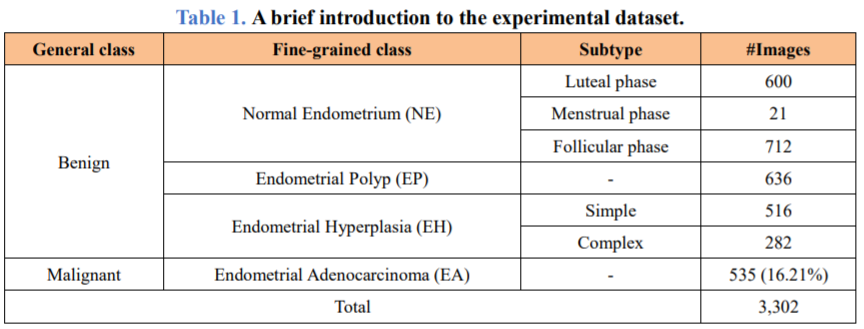

# China 데이터 준비
```
NE/ (normal endometrium)
  Luteal/
  Menstrual/
  Follicular/
EP/ (endometrial polyp)
EH/ (endometrial hyperplasia)
  Simple/
  Complex/
EA (endometrioid adenocarcinoma)

--> modeling for classifying NE/EP/EH/EA: train & test
```

In [ ]:
path_china = '/content/drive/My Drive/ImageAnalysis/digital_pathology/ImageDataset/EMCA/china/histopathological image dataset for ET'
%cd $path_china

/content/drive/My Drive/ImageAnalysis/digital_pathology/ImageDataset/EMCA/china/histopathological image dataset for ET


In [ ]:
os.listdir(path_china+'/NE')

['Follicular', 'Luteal', 'Menstrual']

In [ ]:
china_normal_luteal=[]
china_normal_menstrual=[]
china_normal_follicular=[]

for file_name in glob.glob(path_china+'/NE/Luteal/*.JPG'):
  china_normal_luteal.append(file_name)
for file_name in glob.glob(path_china+'/NE/Menstrual/*.JPG'):
  china_normal_menstrual.append(file_name)
for file_name in glob.glob(path_china+'/NE/Follicular/*.JPG'):
  china_normal_follicular.append(file_name)

len(china_normal_luteal), len(china_normal_menstrual), len(china_normal_follicular)

(600, 21, 712)

In [ ]:
china_polyp=[]
for file_name in glob.glob(path_china+'/EP/*.JPG'):
  china_polyp.append(file_name)
len(china_polyp)

636

In [ ]:
os.listdir(path_china+'/EH')

['Complex', 'Simple']

In [ ]:
china_hpl_simple=[]
china_hpl_complex=[]

for file_name in glob.glob(path_china+'/EH/Simple/*.JPG'):
  china_hpl_simple.append(file_name)
for file_name in glob.glob(path_china+'/EH/Complex/*.JPG'):
  china_hpl_complex.append(file_name)
len(china_hpl_simple), len(china_hpl_complex)

(516, 282)

In [ ]:
china_carcinoma=[]
for file_name in glob.glob(path_china+'/EA/*.JPG'):
  china_carcinoma.append(file_name)
len(china_carcinoma)

535